In [1]:
import pandas as pd
import numpy as np

% matplotlib inline
import matplotlib.pyplot as plt

from datetime import datetime

from pandas.tseries.offsets import *

## Load files

In [17]:

raw_data = pd.read_csv('raw-data/compression-results.txt', delim_whitespace=True, header=None, names=['bytes','filename'])

print("Total of %f TiB" % (raw_data['bytes'].sum() / 2**40))

Total of 0.421584 TiB


## Digest filenames into tarfile, directory

In [37]:

data = pd.DataFrame(raw_data['filename'].str.extract('([a-z]*)([0-9]?)\/(\w*)', expand=True))
data.columns=['compression', 'level','basename']
data['bytes'] = raw_data['bytes']

data.set_index(['compression','level','basename'],inplace=True)
data = data.unstack(level=[0,1])


compression = data['bytes']
compression = compression.divide( compression['raw',''], axis=0)
print(compression)


compression                               bzip                          gzip  \
level                                        1         2         3         1   
basename                                                                       
APLUWCOVISMBSONAR001_20120401T000042  0.237323  0.239532  0.241307  0.324029   
APLUWCOVISMBSONAR001_20120401T000952  0.253067  0.256107  0.258420  0.338677   
APLUWCOVISMBSONAR001_20120401T004720  0.225092  0.228163  0.228944  0.306749   
APLUWCOVISMBSONAR001_20120401T030041  0.241833  0.243953  0.245735  0.329227   
APLUWCOVISMBSONAR001_20120401T030958  0.252067  0.255074  0.257342  0.337139   
APLUWCOVISMBSONAR001_20120401T034727  0.224242  0.227045  0.229379  0.307433   
APLUWCOVISMBSONAR001_20120401T060039  0.235849  0.238185  0.078538  0.322798   
APLUWCOVISMBSONAR001_20120401T061005  0.251758  0.254958  0.257374  0.336795   
APLUWCOVISMBSONAR001_20120401T063122  0.219990  0.222525  0.224039  0.300609   
APLUWCOVISMBSONAR001_20120401T090040  0.

In [38]:
## Take column-wise mean
mean_compression = compression.mean(axis=0)
print(mean_compression)

## Reindex by extracting level from bzip and gzip

compression  level
bzip         1        0.237194
             2        0.239857
             3        0.214786
gzip         1        0.322027
             2        0.312424
             3        0.297783
             4        0.290933
             5        0.287235
             6        0.279554
             7        0.278202
             8        0.275911
             9        0.275553
raw                   1.000000
orig                  0.279555
dtype: float64


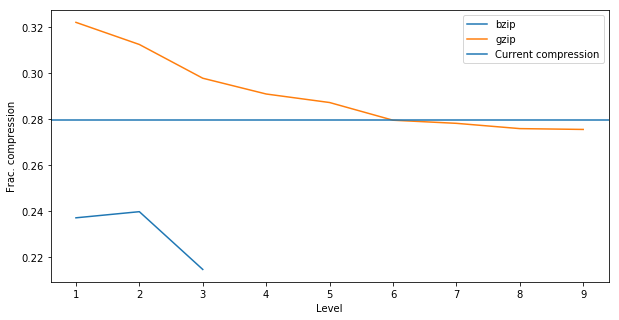

In [48]:
plt.figure()
# Create a figure with a single subplot
f, ax = plt.subplots(1, figsize=(10,5))

for algo in ['bzip', 'gzip']:
    ax.plot( mean_compression[algo], label=algo)

ax.axhline(mean_compression['orig',''], label='Current compression')


ax.legend()
ax.set_ylabel("Frac. compression")
ax.set_xlabel("Level")

plt.show()

